In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow.python.platform
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import time
import matplotlib.pyplot as plt

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0/3000] : 0.407
[500/3000] : 0.910
[1000/3000] : 0.919
[1500/3000] : 0.917
[2000/3000] : 0.906
[2500/3000] : 0.917


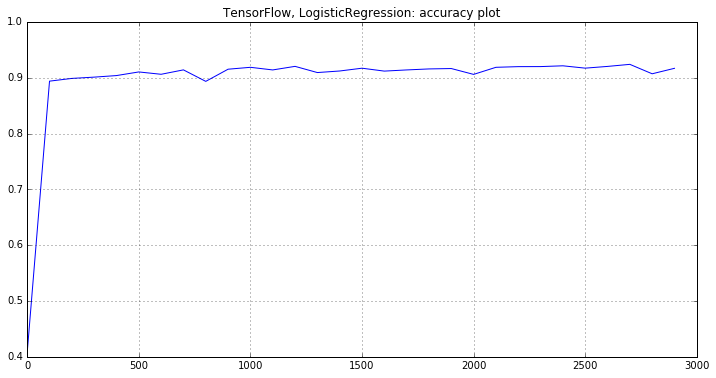

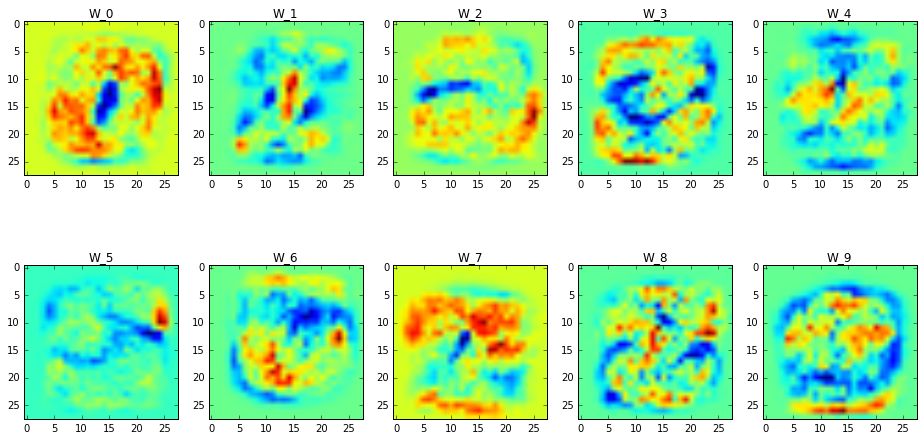

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
sess = tf.Session()
# (1) Logistic Regression: y=softmax(W*x+b)
x = tf.placeholder(tf.float32, [None, 784], name="x-input")
W = tf.Variable(tf.zeros([784, 10]), name="weight-matrix")
b = tf.Variable(tf.zeros([10]), name="bias-vector")
y=tf.nn.softmax(tf.matmul(x,W) + b)
# (2) Loss: logit-loss: H(z,y)=-Sum[z*log(y)]
y_ = tf.placeholder(tf.float32, [None, 10], name="y-input")
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
# (3) Train: Stochastic Gradient Descent
train_step = tf.train.GradientDescentOptimizer(0.0100).minimize(cross_entropy)
# (4) Test:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# (5) Go!
init = tf.initialize_all_variables()
sess.run(init)
#
parNumIter = 3000
arrAcc={'x':[], 'y':[]}
cnt=0
for ii in range(parNumIter):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (ii%100)==0:
        tacc=sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        arrAcc['x'].append(ii)
        arrAcc['y'].append(tacc)
        if (ii%500)==0:
            print "[%d/%d] : %0.3f" % (ii, parNumIter, tacc)
        cnt+=1
# Accuracy-Plot:
plt.figure(figsize=(12,6))
plt.plot(arrAcc['x'], arrAcc['y'])
plt.title('TensorFlow, LogisticRegression: accuracy plot')
plt.grid(True)
# Network Weights visualization:
dataWeights=sess.run(W)
nx=5
ny=2
cnt=0
plt.figure(figsize=(16,8))
for xx in xrange(nx):
    for yy in xrange(ny):
        plt.subplot(ny,nx,cnt+1)
        plt.imshow(dataWeights[:,cnt].reshape((28,28)))
        plt.title('W_%d' % cnt)
        cnt+=1
plt.show()